In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [13]:
df = pd.read_csv('data/2020 Line 280 AVL report.csv')
df['Run Time Variance'][df['Run Time Variance'] < 0] = 0
df['Actual Run Time'][df['Actual Run Time'].astype(int) < 0] = 0
df['Scheduled Run Time'][df['Scheduled Run Time'].astype(int) < 0] = 0
df.head()

C:\Users\Jai\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-13-c624424a3ab2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Run Time Variance'][df['Run Time Variance'] < 0] = 0
<ipython-input-13-c624424a3ab2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Actual Run Time'][df['Actual Run Time'].astype(int) < 0] = 0
<ipython-input-13-c624424a3ab2>:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Transit Date,Vehicle #,Block #,Route #,Trip #,Direction,Pattern,Bus Stop ID,Bus Stop Name,Stop Sequence,...,Dwell Time,Scheduled Run Time,Actual Run Time,Run Time Variance,Miles from Prior Time Point,Scheduled Operating Speed,Actual Operating Speed,Day Type,Day of Week,Time Period
0,12/31/2020,2724,10156,280,280N-0520,North,36-N*280,738,Azusa and Amar N,8,...,1,0,0,0,0.000,NaN,NaN,Weekday,Thursday,AM Peak
1,12/31/2020,2724,10156,280,280N-0520,North,36-N*280,744,Azusa and Cameron N,15,...,2,8,7,0,7.063,53.0,60.5,Weekday,Thursday,AM Peak
2,12/31/2020,2724,10156,280,280N-0520,North,36-N*280,782,Azusa and Rowland N,19,...,2,6,6,0,3.958,39.6,39.6,Weekday,Thursday,AM Peak
3,12/31/2020,2724,10156,280,280N-0520,North,36-N*280,775,Azusa and Arrow Hwy N,26,...,2,0,6,6,6.444,NaN,64.4,Weekday,Thursday,AM Peak
4,12/31/2020,2704,10159,280,280N-0540,North,36-N*280,738,Azusa and Amar N,8,...,2,0,0,0,0.000,NaN,NaN,Weekday,Thursday,AM Peak


In [14]:
bus_actual_runtime=df.groupby(['Transit Date'])['Actual Run Time'].sum().reset_index()
bus_expected_runtime = df.groupby(['Transit Date'])['Scheduled Run Time'].sum().reset_index()

bus_variance_runtime=df.groupby(['Transit Date'])['Run Time Variance'].sum().reset_index()

bus_variance_runtime['Variance Proportion'] = bus_variance_runtime['Run Time Variance'] / bus_actual_runtime['Actual Run Time'] * 100


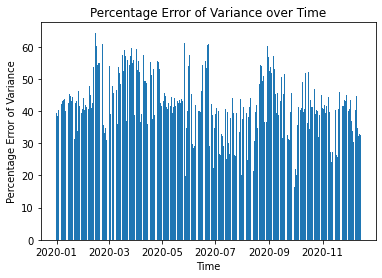

In [15]:
customdate = datetime.datetime(2020, 1, 1, 0, 00)
x = [customdate + datetime.timedelta(days=i) for i in range(len(bus_variance_runtime))]
plt.plot(x, bus_actual_runtime['Actual Run Time'])
plt.plot(x, bus_expected_runtime['Scheduled Run Time'])

  
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Percentage Error of Variance')
  
# giving a title to my graph
plt.title('Percentage Error of Variance over Time')
  
# function to show the plot
plt.show()